# Bolivian Football League Betting Odds
## 3. Model Creation

The purpose of this notebook is to create a base model to benchmark other algorithms against, and then trying out different classifiers on the dataframe previously engineered.

In [300]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.style as style
import matplotlib.pyplot as plt
import seaborn as sns
import string
import matplotlib.ticker as ticker
import re
import math
import sklearn
style.use('fivethirtyeight')

# Importing SKLEARN packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# load dataset
odds = pd.read_csv('/Users/miketondu/Dropbox/Data Science/Sharpest Minds/odds_data/bolivian_football_odds_prepared.csv',
                  parse_dates= ['date'])

# Dropping columns which are no longer useful for modelling purposes
#odds.drop_duplicates('match_href').head(1000)

odds.drop([ 'home_odds', 'draw_odds',
            'away_odds','final_result',
            'away_win', 'home_loss', 'away_loss', 
            'home_points', 'away_points',
            'home_goals', 'away_goals',
            'first_half_home', 'first_half_away',
            'second_half_home','second_half_away',
            'home_games_played', 'away_games_played',
            'home_goals_allowed',
            'away_goals_allowed', 'total_goals', 'total_first_half',
            'total_second_half','home_win_first_h', 'away_win_first_h', 'home_win_second_h',
            'away_win_second_h',
            'cumulative_home_win', 'cumulative_away_win',
            'cumulative_home_loss', 'cumulative_away_loss','cumulative_home_points',
            'cumulative_away_points','cumulative_home_games_played',
            'cumulative_away_games_played','cumulative_home_goals_allowed', 'cumulative_away_goals_allowed',
            'cumulative_home_win_first_h',
            'cumulative_away_win_first_h', 'cumulative_home_win_second_h',
            'cumulative_away_win_second_h', 'cumulative_home_goals',
            'cumulative_away_goals',]
          ,axis=1,inplace=True)


#odds.columns
odds.shape
#odds.info()
odds['season_year'] = odds.season_year.astype('category')
odds_unique = odds.drop_duplicates('match_href')

(20776, 35)

In [301]:
# Dropping columns
odds = odds.loc[:,[ 'implied_home_odds', 'implied_draw_odds', 
                    'implied_away_odds',
                    'season_year',
                    'home_team','away_team',
                    'home_win',               
                    #'over',                    
                    'altitude','tropics',
                    'season_win_home_team', 'season_win_away_team', 
                    'season_loss_home_team', 'season_loss_away_team', 
                    'season_points_home_team','season_points_away_team', 
                    'season_games_played_home_team','season_games_played_away_team',
                    'season_goals_home_team','season_goals_away_team',
                    'season_goals_allowed_home_team', 'season_goals_allowed_away_team',
                    'season_win_first_h_home_team', 'season_win_first_h_away_team',
                    'season_win_second_h_home_team', 'season_win_second_h_away_team']]
odds.shape



(20776, 25)

In [311]:
# Dropping columns
odds_unique = odds_unique.loc[:,[ 'implied_home_odds', 'implied_draw_odds', 
                    'implied_away_odds',
                    #'season_year',
                    'home_team','away_team',
                    'home_win',               
                    #'over',                    
                    'altitude','tropics',
                    'season_win_home_team', 'season_win_away_team', 
                    'season_loss_home_team', 'season_loss_away_team', 
                    'season_points_home_team','season_points_away_team', 
                    'season_games_played_home_team','season_games_played_away_team',
                    'season_goals_home_team','season_goals_away_team',
                    'season_goals_allowed_home_team', 'season_goals_allowed_away_team',
                    'season_win_first_h_home_team', 'season_win_first_h_away_team',
                    'season_win_second_h_home_team', 'season_win_second_h_away_team']]
odds_unique.shape



(2840, 24)

In [312]:
odds.head()

,implied_home_odds,implied_draw_odds,implied_away_odds,season_year,home_team,away_team,home_win,altitude,tropics,season_win_home_team,season_win_away_team,season_loss_home_team,season_loss_away_team,season_points_home_team,season_points_away_team,season_games_played_home_team,season_games_played_away_team,season_goals_home_team,season_goals_away_team,season_goals_allowed_home_team,season_goals_allowed_away_team,season_win_first_h_home_team,season_win_first_h_away_team,season_win_second_h_home_team,season_win_second_h_away_team
0,0.606,0.274,0.233,2008,La Paz,Blooming,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.532,0.299,0.282,2008,Real Potosi,Aurora,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.606,0.286,0.253,2008,La Paz,Blooming,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.541,0.308,0.294,2008,Real Potosi,Aurora,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.667,0.290,0.185,2008,Blooming,La Paz,1,0,0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0


### Base Model
For the purpose of having a base model to compare all other iterations of our model against, we will create a one which will predict a home team win 100% of the time.

In [313]:
# model_df
model_df = odds_unique.copy()
target_var = 'home_win'

# Creating X and Y
X = np.ones(len(odds_unique)).reshape(-1, 1)
y = model_df[target_var]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Score on test set
print('Accuracy of base model predicting only home wins: ', dt.score(X_test, y_test))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Accuracy of base model predicting only home wins:  0.5521126760563381


### Modelling

In [314]:
# Preparing dataframe to feed it into the model
target_var = 'home_win'

model_df = odds_unique.copy().dropna()
X = model_df.loc[:,odds_unique.columns!=target_var] 
X = pd.get_dummies(X)
y = model_df.loc[:,target_var]

X.shape
y.shape

(2840, 61)

(2840,)

In [320]:
# Random forest
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train)

# Prediction on test set
y_pred=rf.predict(X_test)
rf.score(X_test,y_test)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

0.06024250686491184

In [444]:
# SVM 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

# Instantiate model 
clf = SVC()

# Train the model on training data
clf.fit(X_train, y_train)

# Prediction on test set
y_pred=clf.predict(X_test)
clf.score(X_test,y_test)


/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

0.5704225352112676

In [464]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.6, random_state=32)

# Models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFR', RandomForestRegressor()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


# Choose model
clf = models[0][1]

# Train the model on training data
clf.fit(X_train, y_train)

# Prediction on test set
y_pred=clf.predict_proba(X_test)
clf.score(X_test,y_test)



/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

0.636150234741784

/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

LR: 0.648239 (0.014320)
LDA: 0.643310 (0.011168)


/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


KNN: 0.555986 (0.024329)
CART: 0.563028 (0.030946)
NB: 0.614789 (0.036088)


/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/miketondu/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/miketondu/anaconda3/lib/python3.6/si

SVM: 0.571831 (0.019522)


Text(0.5,0.98,'Algorithm Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a42dcb0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a42dcba20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a42dbcf28>,
 'medians': [<matplotlib.lines.Line2D at 0x1a42dd5cf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a42dd5898>,
 'means': []}

[Text(0,0,'LR'),
 Text(0,0,'LDA'),
 Text(0,0,'KNN'),
 Text(0,0,'CART'),
 Text(0,0,'NB'),
 Text(0,0,'SVM')]

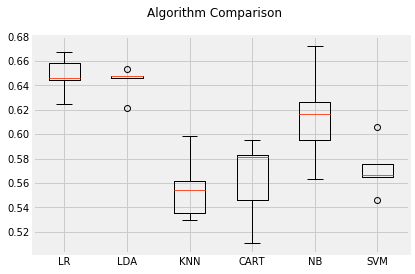

In [319]:
# Compare Algorithms
# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('RFR', RandomForestRegressor()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### GridSearch CV

## Bet simulator

In [326]:
def upset_bet_simulator(dataframe, starting_bankroll, wagering_size):
    upsets = 0
    non_upsets = 0

    bankroll = starting_bankroll

    for i in range(len(dataframe)):
        home_team = dataframe['home_team'].values[i]
        away_team = dataframe['away_team'].values[i]

        home_goals = dataframe['home_goals'].values[i]
        away_goals = dataframe['away_goals'].values[i]

        home_odds = dataframe['home_odds'].values[i]
        draw_odds = dataframe['draw_odds'].values[i]
        away_odds = dataframe['away_odds'].values[i]

        if home_odds > away_odds:
            if home_goals > away_goals:
                upsets += 1
                bankroll += wagering_size * (home_odds - 1)
            else:
                non_upsets += 1
                bankroll -= wagering_size

    ROI = ((bankroll - starting_bankroll) / (wagering_size * (upsets + non_upsets))) * 100

    print ("There were '%s' upsets out of '%s' total matches" % (upsets, upsets + non_upsets))
    print ("Starting bankroll = '%s'" % (starting_bankroll))
    print ("Finishing bankroll = '%s' | ROI = '%s'" % (bankroll, ROI))

In [339]:
X_test.head()

,implied_home_odds,implied_draw_odds,implied_away_odds,altitude,tropics,season_win_home_team,season_win_away_team,season_loss_home_team,season_loss_away_team,season_points_home_team,season_points_away_team,season_games_played_home_team,season_games_played_away_team,season_goals_home_team,season_goals_away_team,season_goals_allowed_home_team,season_goals_allowed_away_team,season_win_first_h_home_team,season_win_first_h_away_team,season_win_second_h_home_team,season_win_second_h_away_team,home_team_Always Ready,home_team_Aurora,home_team_Blooming,home_team_Bolivar,home_team_Ciclon,home_team_Destroyers,home_team_Guabira,home_team_La Paz,home_team_Nacional Potosi,home_team_Oriente Petrolero,home_team_Petrolero de Yacuiba,home_team_Real Mamore,home_team_Real Potosi,home_team_Royal Pari,home_team_San Jose,home_team_Sport Boys,home_team_The Strongest,home_team_U. Pando,home_team_U. Sucre,home_team_Wilstermann,away_team_Always Ready,away_team_Aurora,away_team_Blooming,away_team_Bolivar,away_team_Ciclon,away_team_Destroyers,away_team_Guabira,away_team_La Paz,away_team_Nacional Potosi,away_team_Oriente Petrolero,away_team_Petrolero de Yacuiba,away_team_Real Mamore,away_team_Real Potosi,away_team_Royal Pari,away_team_San Jose,away_team_Sport Boys,away_team_The Strongest,away_team_U. Pando,away_team_U. Sucre,away_team_Wilstermann
19261,0.649,0.238,0.190,0,1,11.0,5.0,13.0,16.0,36.0,22.0,27.0,28.0,42.0,23.0,48.0,47.0,7.0,4.0,13.0,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2260,0.500,0.303,0.312,1,0,12.0,11.0,13.0,12.0,39.0,40.0,28.0,30.0,38.0,40.0,38.0,47.0,10.0,10.0,7.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4619,0.690,0.238,0.182,1,1,2.0,2.0,3.0,3.0,8.0,8.0,7.0,7.0,9.0,12.0,12.0,11.0,1.0,1.0,2.0,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18844,0.444,0.286,0.357,0,1,13.0,10.0,7.0,8.0,41.0,33.0,22.0,21.0,45.0,32.0,36.0,32.0,9.0,5.0,10.0,12.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
24,0.625,0.286,0.233,0,1,2.0,0.0,1.0,0.0,7.0,1.0,4.0,1.0,6.0,3.0,4.0,3.0,1.0,1.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [332]:
len(odds_unique)

2840

In [465]:
predictions = pd.DataFrame(y_pred).set_index(X_test.index)



In [466]:
X_test.head(100)

,implied_home_odds,implied_draw_odds,implied_away_odds,altitude,tropics,season_win_home_team,season_win_away_team,season_loss_home_team,season_loss_away_team,season_points_home_team,season_points_away_team,season_games_played_home_team,season_games_played_away_team,season_goals_home_team,season_goals_away_team,season_goals_allowed_home_team,season_goals_allowed_away_team,season_win_first_h_home_team,season_win_first_h_away_team,season_win_second_h_home_team,season_win_second_h_away_team,home_team_Always Ready,home_team_Aurora,home_team_Blooming,home_team_Bolivar,home_team_Ciclon,home_team_Destroyers,home_team_Guabira,home_team_La Paz,home_team_Nacional Potosi,home_team_Oriente Petrolero,home_team_Petrolero de Yacuiba,home_team_Real Mamore,home_team_Real Potosi,home_team_Royal Pari,home_team_San Jose,home_team_Sport Boys,home_team_The Strongest,home_team_U. Pando,home_team_U. Sucre,home_team_Wilstermann,away_team_Always Ready,away_team_Aurora,away_team_Blooming,away_team_Bolivar,away_team_Ciclon,away_team_Destroyers,away_team_Guabira,away_team_La Paz,away_team_Nacional Potosi,away_team_Oriente Petrolero,away_team_Petrolero de Yacuiba,away_team_Real Mamore,away_team_Real Potosi,away_team_Royal Pari,away_team_San Jose,away_team_Sport Boys,away_team_The Strongest,away_team_U. Pando,away_team_U. Sucre,away_team_Wilstermann
11441,0.389,0.286,0.365,0,1,4.0,6.0,5.0,4.0,13.0,19.0,10.0,11.0,18.0,23.0,21.0,26.0,1.0,5.0,5.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3531,0.345,0.303,0.476,0,1,6.0,11.0,13.0,7.0,23.0,39.0,24.0,24.0,31.0,47.0,48.0,32.0,4.0,12.0,7.0,7.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
959,0.633,0.286,0.192,0,0,11.0,12.0,12.0,19.0,45.0,43.0,35.0,38.0,54.0,60.0,57.0,68.0,7.0,8.0,13.0,11.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1250,0.444,0.303,0.364,1,0,2.0,4.0,6.0,4.0,7.0,13.0,9.0,9.0,7.0,15.0,19.0,12.0,1.0,4.0,1.0,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1925,0.794,0.211,0.105,0,1,5.0,1.0,5.0,8.0,17.0,5.0,12.0,11.0,16.0,11.0,16.0,27.0,4.0,1.0,4.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1992,0.333,0.312,0.465,0,0,1.0,6.0,9.0,5.0,8.0,23.0,15.0,16.0,12.0,29.0,30.0,22.0,1.0,8.0,3.0,6.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
18177,0.250,0.278,0.578,0,0,2.0,7.0,8.0,4.0,9.0,23.0,13.0,13.0,14.0,27.0,23.0,17.0,2.0,8.0,1.0,5.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
20302,0.309,0.260,0.490,1,0,10.0,27.0,22.0,6.0,38.0,90.0,40.0,42.0,60.0,107.0,90.0,56.0,11.0,12.0,9.0,28.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
887,0.645,0.270,0.190,1,1,20.0,15.0,13.0,15.0,65.0,51.0,38.0,36.0,62.0,49.0,44.0,48.0,13.0,12.0,14.0,12.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8709,0.709,0.213,0.141,0,1,1.0,1.0,1.0,1.0,4.0,4.0,3.0,3.0,5.0,4.0,4.0,4.0,1.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [468]:
odds = pd.read_csv('/Users/miketondu/Dropbox/Data Science/Sharpest Minds/odds_data/bolivian_football_odds_prepared.csv',
                  parse_dates= ['date'])
df = pd.concat([odds, predictions], axis=1,join='inner')
len(df)


1704

In [469]:
def kelly(odds,p):
    ''' Kelly criterion formula outputs the fraction of your bankroll to bet depending on the odds predicted
    f = fraction of the bankroll to bet
    b = decimal odds -1
    p = implied probability of our model
    q = probability of losing (1-p)
     '''
    b = odds - 1
    f = (b*p-(1-p))/b
    
    return f


    
    

In [470]:

def model_bet_simulator(dataframe, starting_bankroll):
    bets_won = 0
    bets_lost = 0
    bankroll = starting_bankroll

    for i in range(len(dataframe)):
        home_team = dataframe['home_team'].values[i]
        away_team = dataframe['away_team'].values[i]

        home_goals = dataframe['home_goals'].values[i]
        away_goals = dataframe['away_goals'].values[i]

        home_odds = dataframe['home_odds'].values[i]
        draw_odds = dataframe['draw_odds'].values[i]
        away_odds = dataframe['away_odds'].values[i]
        
        prediction = dataframe[1].values[i]
        # Kelly
        wagering_size = .03 #kelly(home_odds,prediction)/4
        
        # Simulating bets
        if prediction > (1/home_odds):
            if home_goals > away_goals:
                bets_won += 1
                bankroll += (bankroll * wagering_size) * (home_odds - 1)
            else:
                bets_lost += 1
                bankroll -= bankroll * wagering_size

    ROI = round((bankroll - starting_bankroll) / starting_bankroll, 2) * 100

    print ("There were '%s' bets won out of '%s' total matches" % (bets_won, bets_won+bets_lost ))
    print ("Starting bankroll = '%s'" % (starting_bankroll))
    print ("Finishing bankroll = '%s'" % (bankroll))
    print ("Finishing bankroll = '%s' | ROI = '%s'" % (bankroll, ROI))

In [471]:
model_bet_simulator(df, 100)

There were '489' bets won out of '843' total matches
Starting bankroll = '100'
Finishing bankroll = '59.006295358944435'
Finishing bankroll = '59.006295358944435' | ROI = '-41.0'


In [461]:
kelly(1.89, .7)

0.3629213483146066